# Principal Component Analysis

## Compression using PCA
This notebook shows how to use PCA to compress and decompress an image file. I am using MNIST image displaying digit 3 and 5, that are stored in mnist_image_3.png and mnist_image_5.png, respectively. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image  # Import Pillow for saving/loading
plt.style.use('dark_background')

In [18]:
# (SKIP) Load MNIST dataset
# from sklearn.datasets import fetch_openml
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# # ---- Fix: Normalize to 0-255 (uint8) before saving ----
# img = X[0].reshape(28, 28)  # Reshape to 2D (28x28)

# img_uint8 = (img * 255 / img.max()).astype(np.uint8)  # Scale values properly
# img_pil = Image.fromarray(img_uint8)  # Convert to 8-bit grayscale
# img_pil.save(save_path)
# print(f"Image saved as: {save_path}")


In [19]:
# load the 28x28 image
save_path = "mnist_image_3.png" # Show the image

loaded_img = Image.open(save_path).convert("L")  # Convert to grayscale
loaded_img = np.array(loaded_img)  # Convert to numpy array

np.set_printoptions(linewidth=115)
print(loaded_img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 25

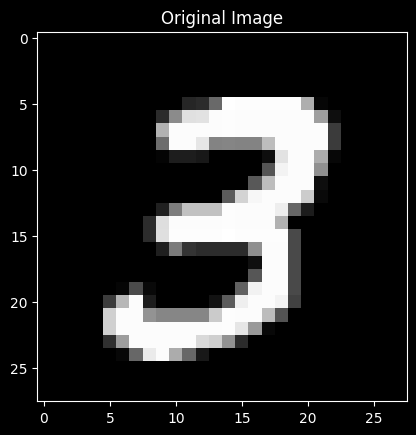

In [20]:
# Show original image
plt.imshow(loaded_img, cmap='gray')
plt.title("Original Image")
plt.show()

## Step1: Standardize
**First step in PCA is to standardize the dataset**

In [21]:
img = loaded_img / 255.0  # Scale to 0-1 range

## Step2: Find the variance of each principal component

In [22]:
pca = PCA(n_components=20) # I am picking first 20 components
X_pca = pca.fit_transform(img)

# Print the explained variance for all 30 components
explained_variance_ratio = np.round(pca.explained_variance_ratio_, 3)
print(explained_variance_ratio[:30])

[0.477 0.269 0.113 0.064 0.038 0.015 0.01  0.004 0.003 0.003 0.002 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.   ]


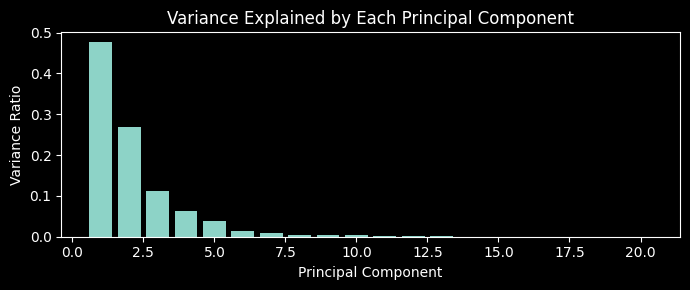

In [23]:
# bar plot
plt.figure(figsize=(7, 3))

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

plt.title("Variance Explained by Each Principal Component", color='white')
plt.xlabel("Principal Component", color='white')
plt.ylabel("Variance Ratio", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

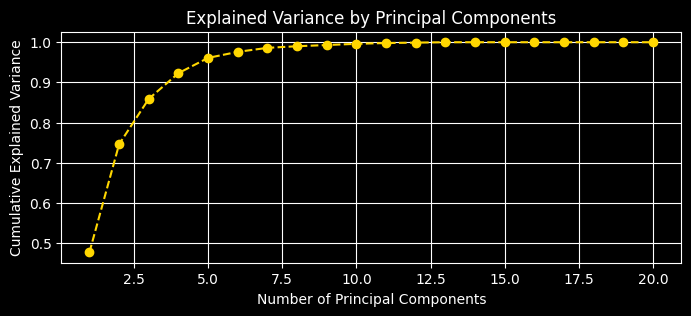

[0.477 0.746 0.859 0.923 0.961 0.976 0.986 0.99  0.993 0.996 0.998 0.999 1.    1.    1.    1.    1.    1.    1.
 1.   ]


In [24]:
# Also, lets plot the cumulative sum
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(),
         marker='o', linestyle='--', color='gold')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print(explained_variance_ratio.cumsum()) # print cumulative sume

## Step3: Identify the number of components you need
**10 components seem to be a good number. It explains about 99% of variance.**

In [34]:
# Apply PCA on rows (each row is a feature vector of 28 pixels)
n_components=10
pca = PCA(n_components=n_components)  # Reduce components
compressed_img = pca.fit_transform(img)

print("Original Shape:", img.shape)
print("Compressed Shape:", compressed_img.shape)

Original Shape: (28, 28)
Compressed Shape: (28, 10)


In [35]:
original_size      = img.nbytes
compressed_size    = compressed_img.nbytes

print(f"Original Data Size: {original_size:.2f} B")
print(f"Compressed Data Size: {compressed_size:.2f} B")

Original Data Size: 6272.00 B
Compressed Data Size: 2240.00 B


In [36]:
# Reconstruct the image
reconstructed_img = pca.inverse_transform(compressed_img)
print(f"Reconstructed Shape: {reconstructed_img.shape}")

reconstructed_size = reconstructed_img.nbytes
print(f"Reconstructed Data Size: {reconstructed_size:.2f} B")

Reconstructed Shape: (28, 28)
Reconstructed Data Size: 6272.00 B


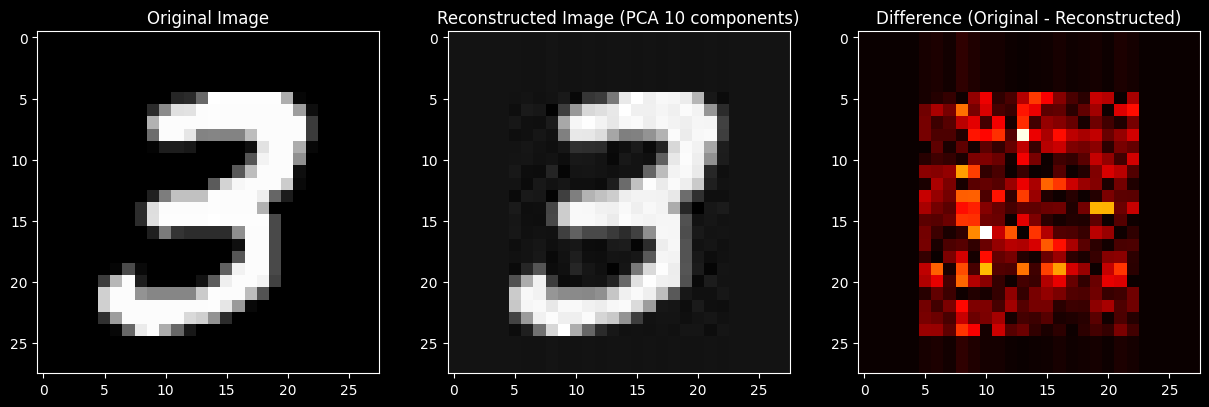

In [37]:
# Now lets plot the original and reconstructed image side-by-side for comparision
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

# Reconstructed Image
ax[1].imshow(reconstructed_img, cmap='gray')
ax[1].set_title(f"Reconstructed Image (PCA {n_components} components)")

# Difference Image
diff_img = np.abs(img - reconstructed_img)  # Absolute difference
ax[2].imshow(diff_img, cmap='hot')  # 'hot' colormap highlights differences
ax[2].set_title("Difference (Original - Reconstructed)")

plt.show()

Heatmap shows a "Difference" Image (brighter areas = more lost details).

**TASK**

1. Try to change n_components to 2, 3, ...10 and see how the quality of image and also size of the compressed image changes

2. Try to change save_path = "mnist_image_3.png", "mnist_image_5.png"

## Key points
Compressed image using PCA can sometimes be larger than the original image.

